In [1]:
# univariate lstm example
import numpy as np
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import Flatten
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
import tensorflow as tf
tf.__version__

'2.3.1'

In [3]:
data = pd.read_csv('cleaned_data_pangan.csv')
data.tail()

,Tanggal,Beras,Beras Kualitas Bawah I (kg),Beras Kualitas Bawah II (kg),Beras Kualitas Medium I (kg),Beras Kualitas Medium II (kg),Beras Kualitas Super I (kg),Beras Kualitas Super II (kg),Bawang Merah,Bawang Merah Ukuran Sedang (kg),Bawang Putih,Bawang Putih Ukuran Sedang (kg),Cabai Merah,Cabai Merah Besar (kg),Cabai Merah Keriting (kg),Cabai Rawit,Cabai Rawit Hijau (kg),Cabai Rawit Merah (kg)
1365,2021-04-26,11750.0,10750.0,10450.0,11800.0,11600.0,13050.0,12700.0,33300.0,33300.0,30250.0,30250.0,43100.0,45050.0,42750.0,57050.0,48750.0,65900.0
1366,2021-04-27,11750.0,10750.0,10450.0,11800.0,11600.0,13050.0,12650.0,33250.0,33250.0,30200.0,30200.0,42000.0,44350.0,41650.0,56200.0,47750.0,65200.0
1367,2021-04-28,11750.0,10750.0,10450.0,11800.0,11600.0,13050.0,12650.0,33200.0,33200.0,30150.0,30150.0,41400.0,43500.0,41050.0,56000.0,47600.0,65150.0
1368,2021-04-29,11750.0,10750.0,10400.0,11750.0,11600.0,13050.0,12650.0,33100.0,33100.0,30250.0,30250.0,40700.0,43500.0,39950.0,55550.0,47500.0,64250.0
1369,2021-04-30,11750.0,10750.0,10400.0,11800.0,11550.0,13050.0,12650.0,33100.0,33100.0,30200.0,30200.0,40150.0,42950.0,39250.0,55000.0,46850.0,63850.0


In [4]:
data['Tanggal'] = pd.to_datetime(data['Tanggal'], infer_datetime_format=True)

In [5]:
data.columns = data.columns.str.replace(' ' , '_')

In [6]:
df = data[['Tanggal','Bawang_Merah']]

In [7]:
df.head()

,Tanggal,Bawang_Merah
0,2017-07-31,33500.0
1,2017-08-01,33200.0
2,2017-08-02,32950.0
3,2017-08-03,32650.0
4,2017-08-04,32150.0


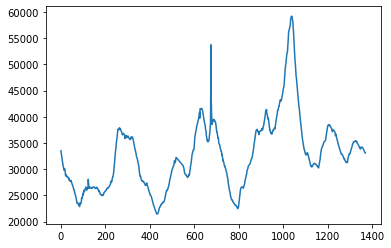

In [9]:
plt.plot(df.iloc[:,1])

### Scaling

LSTMs are sensitive to the scale of the input data, specifically when the sigmoid (default) or tanh activation functions are used. It can be a good practice to rescale the data to the range of 0-to-1, also called normalizing. We can easily normalize the dataset using the MinMaxScaler preprocessing class from the scikit-learn library

In [10]:
from sklearn.preprocessing import MinMaxScaler

In [11]:
df.iloc[:,1]

0       33500.0
1       33200.0
2       32950.0
3       32650.0
4       32150.0
         ...   
1365    33300.0
1366    33250.0
1367    33200.0
1368    33100.0
1369    33100.0
Name: Bawang_Merah, Length: 1370, dtype: float64

In [12]:
scaler=MinMaxScaler()
df=scaler.fit_transform(df.iloc[:,1:])

In [13]:
df.shape

(1370, 1)

In [15]:
##splitting dataset into train and test split
training_size=int(len(df)*0.8)
test_size=len(df)-training_size

In [16]:
training_size, test_size

(1096, 274)

In [17]:
train_data,test_data=df[0:training_size,:],df[training_size:len(df),:1]

In [18]:
train_data.shape,test_data.shape

((1096, 1), (274, 1))

In [19]:
import numpy as np
# preparing independent and dependent features
def prepare_data(timeseries_data, n_features):
    X, y =[],[]
    for i in range(len(timeseries_data)):
        # find the end of this pattern
        end_ix = i + n_features
        # check if we are beyond the sequence
        if end_ix > len(timeseries_data)-1:
            break
        # gather input and output parts of the pattern
        seq_x, seq_y = timeseries_data[i:end_ix], timeseries_data[end_ix]
        X.append(seq_x)
        y.append(seq_y)
    return np.array(X), np.array(y)

In [23]:
# choose a number of time steps
time_step = 14
X_train, y_train = prepare_data(train_data, time_step)
X_test, ytest = prepare_data(test_data, time_step)

In [24]:
X_train.shape

(1082, 14, 1)

In [29]:
model=Sequential()
model.add(LSTM(50,return_sequences=True,input_shape=(14,1)))
model.add(LSTM(50))
model.add(Dense(1))

In [30]:
model.summary()

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm_4 (LSTM)                (None, 14, 50)            10400     
_________________________________________________________________
lstm_5 (LSTM)                (None, 50)                20200     
_________________________________________________________________
dense_2 (Dense)              (None, 1)                 51        
Total params: 30,651
Trainable params: 30,651
Non-trainable params: 0
_________________________________________________________________


In [31]:
early_stopping = tf.keras.callbacks.EarlyStopping(monitor= 'val_loss',
                                                 patience=3,
                                                 mode='min')

model.compile(loss=tf.losses.MeanSquaredError(), 
              optimizer='adam', 
             metrics = [tf.metrics.MeanAbsoluteError()])

history = model.fit(X_train,y_train, epochs = 50,
                             validation_data = (X_test,ytest),
                             shuffle = False,
                             callbacks=[early_stopping])

Epoch 1/50
34/34 [==============================] - 2s 67ms/step - loss: 0.0071 - mean_absolute_error: 0.0651 - val_loss: 6.7503e-04 - val_mean_absolute_error: 0.0226
Epoch 2/50
34/34 [==============================] - 1s 19ms/step - loss: 0.0038 - mean_absolute_error: 0.0461 - val_loss: 0.0017 - val_mean_absolute_error: 0.0372
Epoch 3/50
34/34 [==============================] - 0s 14ms/step - loss: 0.0024 - mean_absolute_error: 0.0368 - val_loss: 4.7704e-04 - val_mean_absolute_error: 0.0191
Epoch 4/50
34/34 [==============================] - 1s 21ms/step - loss: 0.0027 - mean_absolute_error: 0.0388 - val_loss: 0.0019 - val_mean_absolute_error: 0.0391
Epoch 5/50
34/34 [==============================] - 1s 17ms/step - loss: 0.0021 - mean_absolute_error: 0.0337 - val_loss: 5.8706e-04 - val_mean_absolute_error: 0.0212
Epoch 6/50
34/34 [==============================] - 1s 16ms/step - loss: 0.0023 - mean_absolute_error: 0.0353 - val_loss: 0.0017 - val_mean_absolute_error: 0.0375


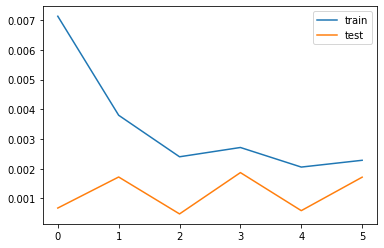

In [32]:
plt.plot(history.history['loss'], label='train')
plt.plot(history.history['val_loss'], label='test')
plt.legend()

In [34]:
### Lets Do the prediction and check performance metrics
train_predict=model.predict(X_train)
test_predict=model.predict(X_test)

In [35]:
##Transformback to original form
train_predict=scaler.inverse_transform(train_predict)
test_predict=scaler.inverse_transform(test_predict)

In [48]:
ytrain = scaler.inverse_transform(y_train)
ytest = scaler.inverse_transform(ytest)

In [50]:
### Calculate RMSE performance metrics
import math
from sklearn.metrics import mean_squared_error
math.sqrt(mean_squared_error(ytrain,train_predict))

1878.413901921703

In [51]:
### Test Data RMSE
math.sqrt(mean_squared_error(ytest,test_predict))

1563.0437960392358

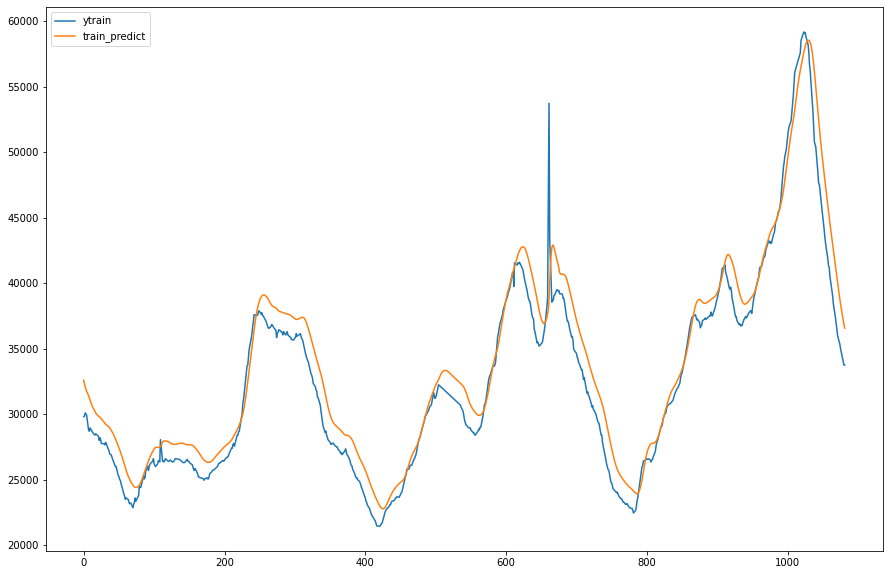

In [62]:
plt.figure(figsize=(15,10))
plt.plot(ytrain, label='ytrain')
plt.plot(train_predict, label='train_predict')
plt.legend()

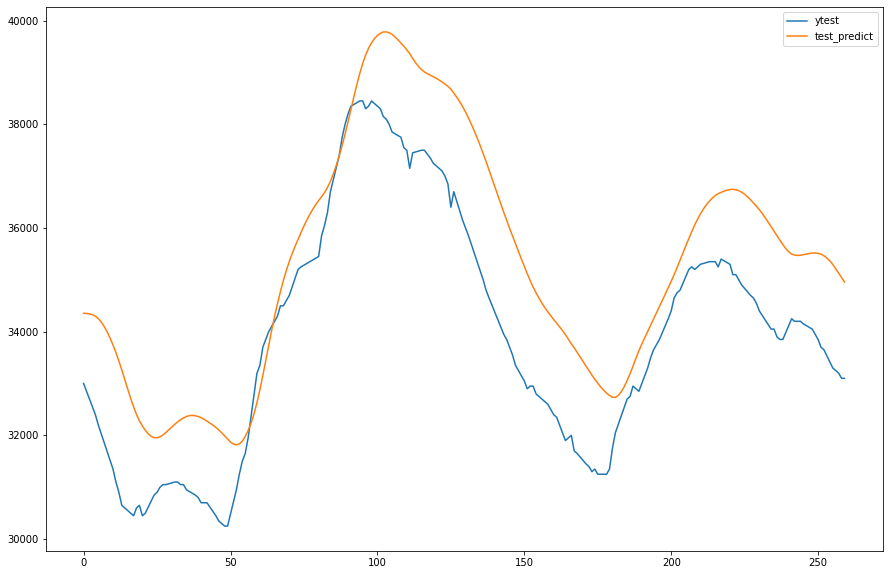

In [63]:
plt.figure(figsize=(15,10))
plt.plot(ytest, label='ytest')
plt.plot(test_predict, label='test_predict')
plt.legend()

In [43]:
df[-14:]

array([[0.33554084],
       [0.33465784],
       [0.33377483],
       [0.33112583],
       [0.32847682],
       [0.32450331],
       [0.32317881],
       [0.3200883 ],
       [0.31699779],
       [0.31390728],
       [0.31258278],
       [0.31125828],
       [0.30860927],
       [0.30860927]])

In [44]:
n_features = 1

In [ ]:
# demonstrate prediction for next 10 days
x_input = df[-14:]
temp_input=list(x_input)
lst_output=[]
i=0
while(i<10):
    
    if(len(temp_input)>14):
        x_input=np.array(temp_input[1:])
        print("{} day input {}".format(i,x_input))
        #print(x_input)
        x_input = x_input.reshape((1, time_step, n_features))
        #print(x_input)
        yhat = model.predict(x_input, verbose=0)
        print("{} day output {}".format(i,yhat))
        temp_input.append(yhat[0][0])
        temp_input=temp_input[1:]
        #print(temp_input)
        lst_output.append(yhat[0][0])
        i=i+1
    else:
        x_input = x_input.reshape((1, time_step, n_features))
        yhat = model.predict(x_input, verbose=0)
        print(yhat[0])
        temp_input.append(yhat[0][0])
        lst_output.append(yhat[0][0])
        i=i+1
    

print(lst_output)

In [ ]:
### Plotting 
# shift train predictions for plotting
look_back=14
trainPredictPlot = np.empty_like(df)
trainPredictPlot[:, :] = np.nan
trainPredictPlot[look_back:len(train_predict)+look_back, :] = train_predict
# shift test predictions for plotting
testPredictPlot = np.empty_like(df)
testPredictPlot[:, :] = np.nan
testPredictPlot[len(train_predict)+(look_back*2)+1:len(df)-1, :] = test_predict
# plot baseline and predictions
plt.plot(scaler.inverse_transform(df))
plt.plot(trainPredictPlot)
plt.plot(testPredictPlot)
plt.show()